# NAI 22 - initial model

In [3]:
print("hello world")


# 1. layer of BiLSTM 1024 of hidden units
# 2. layer of BiLSTM
# classification head W with MLPs
## 2048
## 1024
## 345

# Adam optimiser with learning rate 1e-3

# Train for 10 epochs with batch size of 256

hello world


In [ ]:
asd

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

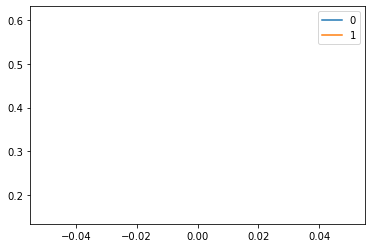

In [6]:
array = np.random.rand(1,2)

df = pd.DataFrame(array)

df.plot()